In [1]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [1]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 500
generations = 500
cross_over_prob = 0.8
mutation_prob = 0.06
elitism_n = 1
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size)

# Run optimzation and write to file
solution, history = ga.solve_tsp(tsp_data=tsp_data, cross_over_prob=cross_over_prob, mutation_prob=mutation_prob, elitism_n=elitism_n)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

NameError: name 'TSPData' is not defined

1343.0


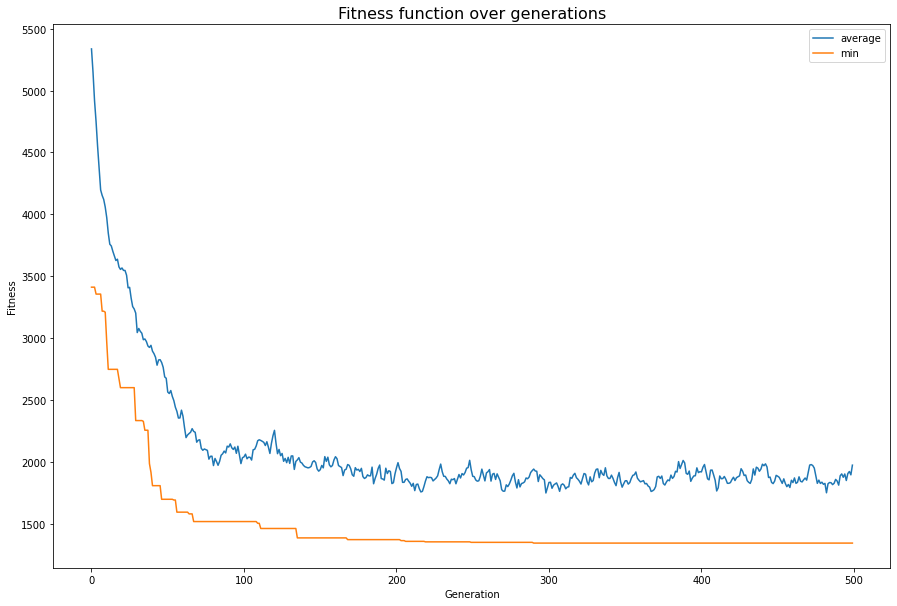

In [12]:
# you can inspect history
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
def plot_hist(res):
    plt.title("Fitness function over generations", fontsize=16)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    av = list(map(lambda x: x.average, res))
    mn = list(map(lambda x: x.min, res))
    mx = list(map(lambda x: x.max, res))
    plt.plot(av, label="average", alpha=1)
    plt.plot(mn, label="min", alpha=1)

    plt.legend()

plot_hist(history)
print(history[-1].min)

### Part 2: Path Finding Through Ant Colony Optimization

In [6]:
# Please keep your parameters for the ACO easily changeable here
gen = 2500 # number of ants in the generation
no_gen = 20 # number of generations
q = 1600 # pheromone constant to determine amount of pheromone ants drop after completing the route
evap = 0.2 # evaporation constant
alpha = 0.6 # when determining the probability of picking path with pheromones, every pheromone value is brought to power of alpha (pheromone ^ alpha * heuristic & beta / sum of(pheromone ^ alpha))
random_start = 0 # portion of total generations, that will use random ant’s start positions 
toxic_start = 0.1 # portion of total generations, that will use dead-trails (look 2.4.15)
convergence = 5 # if shortest route length stays the same for that many generations, stop the optimization
alpha_ants = (0.2, 2) # parameters for stronger ants, first element indicates their number from the generation and the second one shoes how much additional pheromone they drop. In this case, they drop 2 additional doses, resulting in total of 2 doses dropped.

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, colony_history = aco.find_shortest_route(spec, alpha=alpha, random_start=random_start, toxic_start=toxic_start, convergence=convergence, alpha_ants=alpha_ants)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))
print(shortest_route)
# Save solution
#shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

Ready reading maze file ./../data/hard_maze.txt
Time taken: 76.615
0;
0;
0;
0;
0;
3;
3;
3;
3;
3;
3;
0;
0;
1;
1;
1;
1;
1;
1;
0;
0;
3;
3;
0;
0;
0;
0;
3;
3;
3;
2;
2;
3;
3;
3;
3;
3;
3;
3;
3;
0;
0;
1;
1;
1;
1;
1;
0;
0;
3;
0;
0;
1;
0;
0;
3;
3;
3;
3;
3;
0;
0;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
1;
1;
1;
0;
0;
1;
1;
0;
0;
0;
0;
0;
0;
3;
3;
3;
3;
3;
3;
3;
3;
3;
3;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
1;
0;
0;
3;
3;
3;
3;
3;
3;
3;
3;
3;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
1;
0;
0;
3;
3;
3;
3;
3;
3;
3;
3;
3;
3;
3;
3;
2;
2;
2;
2;
2;
2;
2;
2;
3;
2;
2;
2;
2;
2;
2;
3;
3;
0;
0;
3;
3;
2;
2;
3;
3;
3;
2;
2;
2;
2;
2;
2;
2;
2;
2;
2;
2;
2;
2;
2;
3;
3;
3;
3;
0;
3;
0;
3;
2;
3;
3;
3;
3;
2;
3;
3;
3;
3;
3;
3;
3;
3;
0;
0;
0;
0;
3;
0;
0;
1;
1;
1;
1;
1;
1;
1;
0;
0;
0;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
0;
0;
0;
0;
0;
0;
0;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
1;
0;
0;
1;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
1;
1;
1;
1;
1;
1;
2;
2;
2;
2;
2;
2;
1;
1;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;


### Synthesis

In [8]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 2500 # number of ants in the generation
no_gen = 10 # number of generations
q = 1600 # pheromone constant to determine amount of pheromone ants drop after completing the route
evap = 0.2 # evaporation constant
alpha = 0.6 # when determining the probability of picking path with pheromones, every pheromone value is brought to power of alpha (pheromone ^ alpha * heuristic & beta / sum of(pheromone ^ alpha))
random_start = 0 # portion of total generations, that will use random ant’s start positions 
toxic_start = 0.5 # portion of total generations, that will use dead-trails (look 2.4.15)
convergence = 5 # if shortest route length stays the same for that many generations, stop the optimization
alpha_ants = (0.2, 2) # parameters for stronger ants, first element indicates their number from the generation and the second one shoes how much additional pheromone they drop. In this case, they drop 2 additional doses, resulting in total of 2 doses dropped.

population_size = 500
generations = 500
cross_over_prob = 0.8
mutation_prob = 0.06
elitism_n = 1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco, alpha, random_start, toxic_start, convergence, alpha_ants)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution, history = ga.solve_tsp(tsp_data=tsp_data, cross_over_prob=cross_over_prob, mutation_prob=mutation_prob, elitism_n=elitism_n)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

Ready reading maze file ./../data/hard_maze.txt


KeyboardInterrupt: 

In [3]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 30 # number of ants in the generation
no_gen = 2 # number of generations
q = 1600 # pheromone constant to determine amount of pheromone ants drop after completing the route
evap = 0.2 # evaporation constant
alpha = 0.6 # when determining the probability of picking path with pheromones, every pheromone value is brought to power of alpha (pheromone ^ alpha * heuristic & beta / sum of(pheromone ^ alpha))
random_start = 0 # portion of total generations, that will use random ant’s start positions 
toxic_start = 0.5 # portion of total generations, that will use dead-trails (look 2.4.15)
convergence = 5 # if shortest route length stays the same for that many generations, stop the optimization
alpha_ants = (0.2, 2) # parameters for stronger ants, first element indicates their number from the generation and the second one shoes how much additional pheromone they drop. In this case, they drop 2 additional doses, resulting in total of 2 doses dropped.

population_size = 500
generations = 500
cross_over_prob = 0.8
mutation_prob = 0.06
elitism_n = 1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products_easy.txt"
coordinates = "./../data/easy_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/easy_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco, alpha, random_start, toxic_start, convergence, alpha_ants)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution, history = ga.solve_tsp(tsp_data=tsp_data, cross_over_prob=cross_over_prob, mutation_prob=mutation_prob, elitism_n=elitism_n)
tsp_data2.write_action_file(solution, "./../data/tsp_solution2.txt")

Ready reading maze file ./../data/easy_maze.txt
True
